In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Geometric Brownian Motion (GBM) is a mathematical model employed to forecast future prices of financial assets such as stocks. It assumes that the logarithm of the stock price evolves according to a Brownian motion with drift, incorporating both random fluctuations and a deterministic trend. This model is widely utilized in finance due to its ability to capture the stochastic nature of asset prices and their long-term growth tendency. In this code, we utilize historical share prices of Apple and Tesla from 2020 to 2024 to simulate future price paths using 25 simulated paths and 500 discrete time steps. Our goal is to generate and visualize multiple potential future price trajectories, analyze their statistical properties, and gain insights into the expected behavior and volatility of these stocks

In [37]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.set_index("Date", inplace=True)
    return data['Close']

In [38]:
def calculated_annualized_volatility(prices):
    log_returns = np.log(prices / prices.shift(1)).dropna()
    volatility = np.std(log_returns) * np.sqrt(252)
    return volatility

1. **Formula for Updating Log Prices:**

   $$
   X_{i+1} = X_i + \left(r - \frac{1}{2} \sigma^2\right) \Delta t + \sigma \sqrt{\Delta t} Z_i
   $$

   Where:
   - $X_{i+1}$: Updated log price at time step $(i+1)$.
   - $X_i$: Log price at time step $(i)$.
   - $r$: Drift term (expected return), representing the average rate of return of the stock.
   - $\sigma$: Volatility of the stock price, indicating the standard deviation of returns.
   - $\Delta t$: Time increment, often calculated as $\frac{T}{\text{NoOfSteps}}$, where $T$ is the total time horizon and $\text{NoOfSteps}$ is the number of steps.
   - $Z_i$: Random sample from a standard normal distribution, representing the stochastic (random) component of the price movement.

2. **Standardization Formula:**

   To standardize a vector of random variables $Z$, the formula is:

   $$
   Z' = \frac{Z - \mu}{\sigma}
   $$

   Where:
   - $Z$: Original vector of random variables.
   - $\mu$: Mean of $Z$.
   - $\sigma$: Standard deviation of $Z$.
   - $Z'$: Standardized vector with a mean of 0 and standard deviation of 1.

3. **Annualized Volatility Calculation:**

   To calculate the annualized volatility from daily log returns:

   $$
   \text{Volatility} = \text{std}(\text{log returns}) \times \sqrt{252}
   $$

   Where:
   - $\text{std}(\text{log returns})$: Standard deviation of daily log returns.
   - $252$: Approximate number of trading days in a year.

4. **GBM Model Overview:**

   The Geometric Brownian Motion (GBM) model is used to simulate stock prices and is given by:

   $$
   dS(t) = \mu S(t) \, dt + \sigma S(t) \, dW(t)
   $$

   Where:
   - $dS(t)$: Change in stock price at time $t$.
   - $\mu$: Drift coefficient, representing the rate of return.
   - $S(t)$: Stock price at time $t$.
   - $\sigma$: Volatility coefficient, representing the risk or uncertainty in the stock price.
   - $dW(t)$: Increment of a Wiener process (standard Brownian motion), representing the random component of the price movement.


In [39]:
def generating_paths_gbm(NoofPaths, NoofSteps,T,r,sigma,S_O):
    np.random.seed(1)
    Z = np.random.normal(0, 1.0, [NoofPaths, NoofSteps])
    X = np.zeros([NoofPaths, NoofSteps+1])
    S = np.zeros([NoofPaths, NoofSteps+1])
    time = np.zeros([NoofSteps+1])

    X[:,0] = np.log(S_O)
    dt = T / float(NoofSteps)

    for i in range(0, NoofSteps):
        if NoofPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i]) #normalize the Z vector with mean 0 and std 1
            
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2) * dt + sigma * np.power(dt, 0.5) * Z[:,i]
        time[i+1] = time[i] + dt
        
    S = np.exp(X)

    return {"time": time, "X": X, "S": S}

In [40]:
def plot_paths(paths, stock_name):
    timeGrid = paths['time']
    S = paths['S']

    plt.figure()
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title(f"Simulated Paths for {stock_name}")
    plt.show()

In [41]:
def calculate_statistics(paths):
    S = paths['S']
    final_prices = S[:, -1]
    mean_price = np.mean(final_prices)
    std_price = np.std(final_prices)
    return mean_price, std_price

In [42]:
def print_paths(paths):
    time = paths["time"]
    X = paths["X"]
    S = paths["S"]
    
    print("Time Steps:")
    print(time)
    
    print("\nLog Prices (X):")
    print(X)
    
    print("\nSimulated Stock Prices (S):")
    print(S)

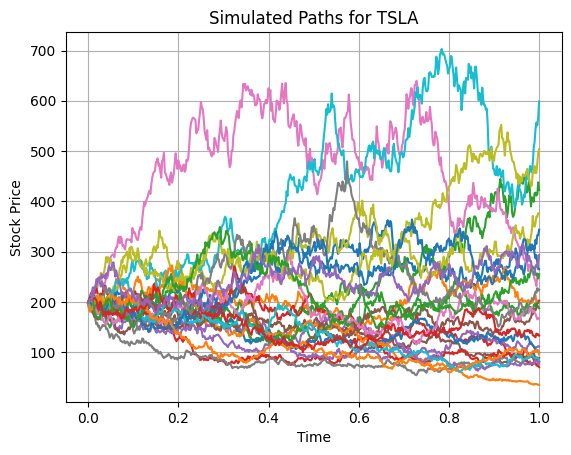

TSLA - Mean Final Price: 209.69, Standard Deviation: 143.91
Time Steps:
[0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058 0.06  0.062 0.064 0.066 0.068 0.07
 0.072 0.074 0.076 0.078 0.08  0.082 0.084 0.086 0.088 0.09  0.092 0.094
 0.096 0.098 0.1   0.102 0.104 0.106 0.108 0.11  0.112 0.114 0.116 0.118
 0.12  0.122 0.124 0.126 0.128 0.13  0.132 0.134 0.136 0.138 0.14  0.142
 0.144 0.146 0.148 0.15  0.152 0.154 0.156 0.158 0.16  0.162 0.164 0.166
 0.168 0.17  0.172 0.174 0.176 0.178 0.18  0.182 0.184 0.186 0.188 0.19
 0.192 0.194 0.196 0.198 0.2   0.202 0.204 0.206 0.208 0.21  0.212 0.214
 0.216 0.218 0.22  0.222 0.224 0.226 0.228 0.23  0.232 0.234 0.236 0.238
 0.24  0.242 0.244 0.246 0.248 0.25  0.252 0.254 0.256 0.258 0.26  0.262
 0.264 0.266 0.268 0.27  0.272 0.274 0.276 0.278 0.28  0.282 0.284 0.286
 0.288 0.29  0.292 0.294 0.296 0.298 0.3   0.302 0.304

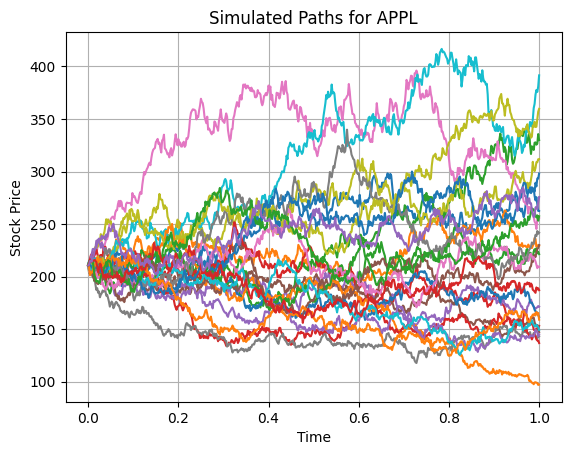

APPL - Mean Final Price: 220.94, Standard Deviation: 75.59
Time Steps:
[0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058 0.06  0.062 0.064 0.066 0.068 0.07
 0.072 0.074 0.076 0.078 0.08  0.082 0.084 0.086 0.088 0.09  0.092 0.094
 0.096 0.098 0.1   0.102 0.104 0.106 0.108 0.11  0.112 0.114 0.116 0.118
 0.12  0.122 0.124 0.126 0.128 0.13  0.132 0.134 0.136 0.138 0.14  0.142
 0.144 0.146 0.148 0.15  0.152 0.154 0.156 0.158 0.16  0.162 0.164 0.166
 0.168 0.17  0.172 0.174 0.176 0.178 0.18  0.182 0.184 0.186 0.188 0.19
 0.192 0.194 0.196 0.198 0.2   0.202 0.204 0.206 0.208 0.21  0.212 0.214
 0.216 0.218 0.22  0.222 0.224 0.226 0.228 0.23  0.232 0.234 0.236 0.238
 0.24  0.242 0.244 0.246 0.248 0.25  0.252 0.254 0.256 0.258 0.26  0.262
 0.264 0.266 0.268 0.27  0.272 0.274 0.276 0.278 0.28  0.282 0.284 0.286
 0.288 0.29  0.292 0.294 0.296 0.298 0.3   0.302 0.304 

In [43]:
def main():
    tsla = load_data('TSLA.csv')
    appl = load_data('AAPL.csv')
    tsla_volatility = calculated_annualized_volatility(tsla)
    appl_volatility = calculated_annualized_volatility(appl)

    stocks = [
        {"name": "TSLA", "NoofPaths": 25, "NoofSteps": 500, "T": 1, "r": 0.042, "sigma": tsla_volatility, "S_0": tsla.iloc[-1]},
        {"name": "APPL", "NoofPaths": 25, "NoofSteps": 500, "T": 1, "r": 0.042, "sigma": appl_volatility, "S_0": appl.iloc[-1]}
    ]
    for stock in stocks:
        paths = generating_paths_gbm(stock['NoofPaths'], stock['NoofSteps'], stock['T'], stock["r"], stock["sigma"], stock["S_0"])
        plot_paths(paths, stock['name'])
        mean_price, std_price =calculate_statistics(paths)
        print(f"{stock['name']} - Mean Final Price: {mean_price:.2f}, Standard Deviation: {std_price:.2f}")
        print_paths(paths)
main()